In [33]:
import pandas as pd
import numpy as np

df = pd.read_csv('Auto.csv')

for data in df:
    df.replace('?', np.nan, inplace=True)
    df.dropna(inplace=True)

print(df.to_string())

    

      mpg  cylinders  displacement horsepower  weight  acceleration  year  origin                                  name
0    18.0          8         307.0        130    3504          12.0    70       1             chevrolet chevelle malibu
1    15.0          8         350.0        165    3693          11.5    70       1                     buick skylark 320
2    18.0          8         318.0        150    3436          11.0    70       1                    plymouth satellite
3    16.0          8         304.0        150    3433          12.0    70       1                         amc rebel sst
4    17.0          8         302.0        140    3449          10.5    70       1                           ford torino
5    15.0          8         429.0        198    4341          10.0    70       1                      ford galaxie 500
6    14.0          8         454.0        220    4354           9.0    70       1                      chevrolet impala
7    14.0          8         440.0      

In [34]:
mpg_median = df['mpg'].median()

y = df["mpg"].apply(lambda x: 1 if x > mpg_median else 0)
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
392    1
393    1
394    1
395    1
396    1
Name: mpg, Length: 392, dtype: int64


In [35]:
df.drop(['mpg'], axis=1, inplace=True)
df.drop(['name'], axis=1, inplace=True)
X = df

print(df.to_string())

     cylinders  displacement horsepower  weight  acceleration  year  origin
0            8         307.0        130    3504          12.0    70       1
1            8         350.0        165    3693          11.5    70       1
2            8         318.0        150    3436          11.0    70       1
3            8         304.0        150    3433          12.0    70       1
4            8         302.0        140    3449          10.5    70       1
5            8         429.0        198    4341          10.0    70       1
6            8         454.0        220    4354           9.0    70       1
7            8         440.0        215    4312           8.5    70       1
8            8         455.0        225    4425          10.0    70       1
9            8         390.0        190    3850           8.5    70       1
10           8         383.0        170    3563          10.0    70       1
11           8         340.0        160    3609           8.0    70       1
12          

0.880168776371308


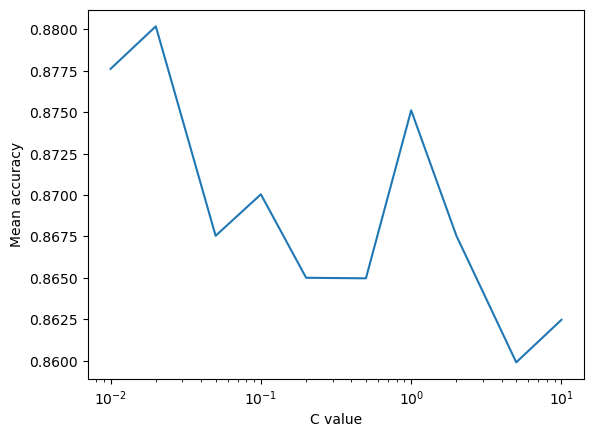

In [36]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define the grid for C values
C_values = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]

# Initialize list to store mean accuracies
mean_accuracies = []

# For each C value in the grid
for C in C_values:
    # Initialize the SVM with linear kernel and current C value
    clf = svm.SVC(kernel='linear', C=C)
    
    # Perform 5-fold cross-validation, calculating accuracy for each fold
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    
    # Compute the mean accuracy across all folds
    mean_accuracy = scores.mean()
    
    # Store the mean accuracy
    mean_accuracies.append(mean_accuracy)

print(max(mean_accuracies))

# Plot mean accuracy against C values using semilogx
plt.semilogx(C_values, mean_accuracies)
plt.xlabel('C value')
plt.ylabel('Mean accuracy')
plt.show()

0.8850697825381368


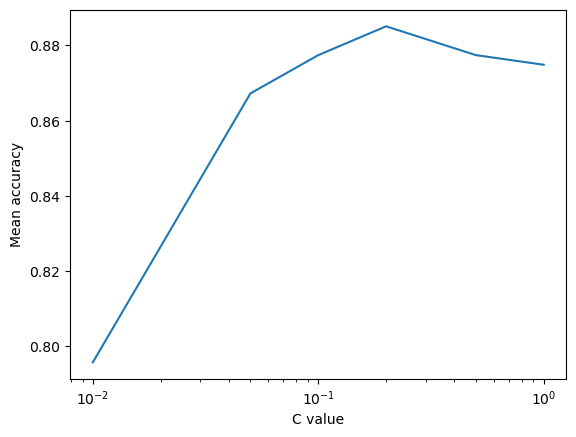

In [37]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define the grid for C values
C_values = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]

# Initialize list to store mean accuracies
mean_accuracies = []

# For each C value in the grid
for C in C_values:
    # Initialize the SVM with polynomial kernel of degree 2 and current C value
    clf = svm.SVC(kernel='poly', degree=2, C=C)
    
    # Perform 5-fold cross-validation, calculating accuracy for each fold
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    
    # Compute the mean accuracy across all folds
    mean_accuracy = scores.mean()
    
    # Store the mean accuracy
    mean_accuracies.append(mean_accuracy)

print(max(mean_accuracies))

# Plot mean accuracy against C values using semilogx
plt.semilogx(C_values, mean_accuracies)
plt.xlabel('C value')
plt.ylabel('Mean accuracy')
plt.show()

0.5128529698149951


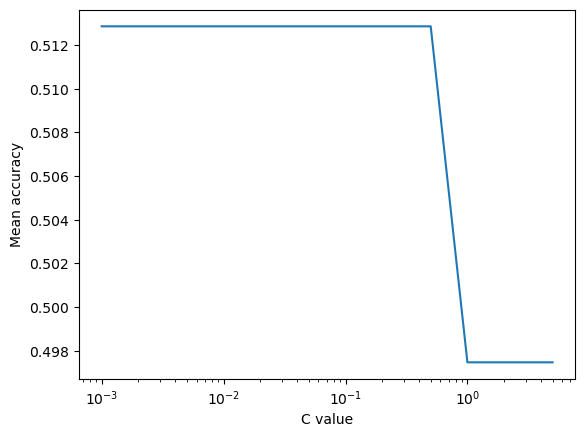

In [46]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define the grid for C values
C_values = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0]

# Initialize list to store mean accuracies
mean_accuracies = []

# For each C value in the grid
for C in C_values:
    # Initialize the SVM with RBF kernel and current C value
    clf = svm.SVC(kernel='rbf', C=C, gamma=0.00001)  #le' is one option for gamma, adjust as needed
    
    # Perform 5-fold cross-validation, calculating accuracy for each fold
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    
    # Compute the mean accuracy across all folds
    mean_accuracy = scores.mean()
    
    # Store the mean accuracy
    mean_accuracies.append(mean_accuracy)

# max of mean accuracies:
print(max(mean_accuracies))

# Plot mean accuracy against C values using semilogx
plt.semilogx(C_values, mean_accuracies)
plt.xlabel('C value')
plt.ylabel('Mean accuracy')
plt.show()